On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this notebook we will go through some simple analysis and refer to the tools that you have seen in the Datacamp courses. We will train a couple of simple models to predict the survival rate with machine learning. First, let's list the data that are available on this kaggle notebook

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/titanic/train.csv
/content/titanic/test.csv


In the input folder we find the train and test data in csv format.

# Data exploration and cleaning


As a first step, we will explore the distribution of data, their correlation and type. First, let's import the the data as a pandas dataframe.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('/content/titanic/train.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In the dataframe, each column represents:
* survival -> Survival -> 0 = No, 1 = Yes
* pclass -> Ticket class -> 1 = 1st, 2 = 2nd, 3 = 3rd
* sex -> Sex -> male/female
* Age -> Age in years
* sibsp -> # of siblings / spouses aboard the Titanic
* parch -> # of parents / children aboard the Titanic
* ticket -> Ticket number
* fare -> Passenger fare
* cabin -> Cabin number
* embarked -> Port of Embarkation -> C = Cherbourg, Q = Queenstown, S = Southampton

With `.info()` we check numerical/categorical columns

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Cleaning categorical features

To get some info on non-numerical variables, we can still use the `.describe()` command but we need to pass the argument `include=['object']`

In [ ]:
train_df.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
train_df[['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']].head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


Some important remarks:
* Names are unique across the dataset (count=unique=891)
* Sex variable has two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. In other words, several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

**Task: 1**

Which column has the most number of missing values?

In [ ]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Most missing values in column _____

---

To simplify our analysis, we will drop the 'Ticket', 'Cabin' and 'Embarked' columns.

In [ ]:
train_df = train_df.drop(['Ticket', 'Cabin', 'Embarked'], axis=1)

### Feature Engineering: Creating new features from existing ones: Titles from Names

In [ ]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708


We see that the names contains information about the titles of the passengers. Lets extract the titles from the names.

**Task: 2**

You can use regular expression to extract the titles. What should we be looking for? How does the title stand apart from the rest of the name?

Once we have the regex expression, we can use `str.extract()` method with the regex expression on the Name column.

Extract the titles to a new column named `'Title'`.

In [ ]:
train_df['Title'] = train_df.Name.str.extract('([A-Za-z]+)\.')

The frequency of occurance of each of the titles in males and females can be obtained by using a cross tabulation frequency table.



In [ ]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


We see that there are several titles, some referring to the same type of person. Some of the title are very rare among the passengers.

**Task: 3**

* Replace the following titles with the word `'Rare'`.


`['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']`

* Replace the title `'Mlle'` with `'Miss'`. (Mademoiselle is a French courtesy title, abbreviated Mlle, traditionally given to an unmarried woman)

* Replace the title `'Mme'` with `'Mrs'`. (French title Madame for married woman)

* Replace the title `'Ms'` with `'Miss'`. 



In [ ]:
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'], 'Rare')

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

We should now have 5 titles. Let us check the survival rate of each of these title holders.


**Task: 4**

Calculate the mean value of the column `'Survived'` for each of the titles. 

In [ ]:
train_df[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


The most survival rate was associated with the title _____

---

### Categorical value encoding 

It is easier to work with numeric features. We can convert the `Sex` and `Title` columns to numeric columns.

**Task: 5**

Convert the `Sex` column to numeric column `is_female` with value 1 for female and 0 for male.

In [ ]:
train_df['is_female'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,is_female
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mr,0


It is often useful to encode categorical variables into one-hot encodings. We can convert the `Title` column to one-hot encoding of the constituent values.

**Task: 6**

Convert the column `Title` to one-hot encoding and add to the dataframe. Then new column names should be like `'is_Mr'`, `'is_Miss'`, etc

In [ ]:
title_encodings = pd.get_dummies(train_df["Title"], prefix="is")
train_df = pd.concat([train_df, title_encodings], axis=1)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Title,is_female,is_Master,is_Miss,is_Mr,is_Mrs,is_Rare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,Mr,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,Mrs,1,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,Miss,1,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,Mrs,1,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,Mr,0,0,0,1,0,0


At this point, we can drop the `'Name'`, `'Sex'` and `'Title'` columnns

In [ ]:
train_df.drop(['Name', 'Sex', 'Title'] , axis=1, inplace = True)

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,is_female,is_Master,is_Miss,is_Mr,is_Mrs,is_Rare
0,1,0,3,22.0,1,0,7.2500,0,0,0,1,0,0
1,2,1,1,38.0,1,0,71.2833,1,0,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,1,0,1,0,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,0,1,0,0


# Cleaning Numerical features

Now that we have dealt with categorical columns in our dataframe, we can move on to analysing the numerical columns.

### Feature engineering

We can associate for each passenger the number of family members. From this we can also get a new feature representing if the passenger is alone or not.

**Task: 7**

Create a new column named `'FamilySize'`. The value should be the number of siblings/ spouse + the number of parents/ children + the person itself.

Also calculate the survival rate for each of the family size.

In [ ]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby('FamilySize').mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4,0.724138
3,0.578431
2,0.552795
7,0.333333
1,0.303538
5,0.200000
6,0.136364
8,0.000000
11,0.000000


The survival rate was maximum for the family size _____

---

**Task: 8**

Another similar feature we can extract is whether a person was alone or not. Add a new column is_alone with value 1 if the passenger is alone and 0 if he/she has family members together with him/her.

Calculate the survival rate for passengers who are not alone.

In [ ]:
train_df['is_alone'] = train_df['FamilySize'].apply(lambda x: 1 if x==1 else 0)

train_df[['is_alone', 'Survived']].groupby(['is_alone']).mean()

,Survived
is_alone,
0,0.505650
1,0.303538


Survival rate for passengers who are not alone is _______

---



Now we can drop the columns `SibSp` and `Parch`. 

In [ ]:
train_df.drop(['SibSp', 'Parch'] , axis=1, inplace = True)

We can visualize the correlations between features by plotting a heatmap of the correlation values.

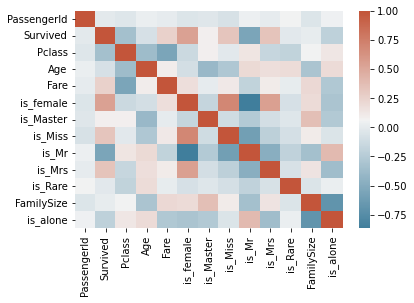

In [ ]:
corr_matr = train_df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matr, cmap = cmap)

From the plots, we have seen that the `'PassengerId'` column has almost no correlation with the other columns. It is just a high cardinality feature. Therefore, we will drop it from the training dataframe.

In [ ]:
train_df = train_df.drop(['PassengerId'], axis=1)

**Conclusions from data analysis and feature extraction**

**Dropped features**

* Ticket feature was be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* Cabin feature was be dropped as it is highly incomplete or contains many null values.
* PassengerId was be dropped from training dataset as it not correlated to survival.


**Created features**

* Created a new feature called Family based on Parch and SibSp to get total count of family members on board.
* Extracted Title from Name as a new feature. One-hot encoded it for modelling.

# Model training and testing



Let's create the proper train and validation set from the train_df dataframe.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


Create the features and labels from the data and split the data into training set (70%) and validation set (30%). 

In [ ]:
X = train_df.loc[:, train_df.columns != 'Survived']
y = train_df.loc[:, 'Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

**Question**

We are now going to train 4 different models, 2 Knn (one scaled, one not) and 2 Random Forest models (also, one scaled, one not). What to we expect from scaling the input data?

a) Knn score improves, Random forest remains (more or less) the same \
b) Both Knn and Random forest scores improve \
c) Both scores remain the same (more or less) \
d) Both scores get worse

# KNN training and scoring

In sklearn, both Knn and Random Forests do not handle missing values internally. Therefore, we need to impute the missing values before passing it through the models

In [ ]:
X_train = X_train.fillna(X_train.mean())
X_val= X_val.fillna(X_val.mean())

We can now move on to training the KNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
knn.score(X_val, y_val)

0.7089552238805971

Now train the model on scaled data.

In [ ]:
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)
knn.score(X_val_scaled, y_val)

0.8283582089552238

In this example we have only used a standard scaler, but often other types of scaling yield better results. For example, some features may benefit from log scaling their values (typical for "fat tails")

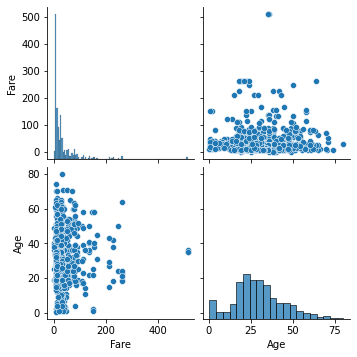

In [ ]:
sns.pairplot(train_df[['Fare', 'Age']])

# Random forest training and scoring

Train a Random Forest classifier on the unscaled data.

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print(f'accuracy score: {accuracy_score(rf.predict(X_val), y_val)}')
print(f'Feature importance: \n {dict(zip(X.columns, rf.feature_importances_.round(2)))}')

accuracy score: 0.8059701492537313
Feature importance: 
 {'Pclass': 0.08, 'Age': 0.23, 'Fare': 0.29, 'is_female': 0.14, 'is_Master': 0.01, 'is_Miss': 0.02, 'is_Mr': 0.11, 'is_Mrs': 0.04, 'is_Rare': 0.01, 'FamilySize': 0.07, 'is_alone': 0.01}


Now train a Random Forest classifier on the scaled data.

In [ ]:
rf.fit(X_train_scaled, y_train)
print(f'accuracy score: {accuracy_score(rf.predict(X_val_scaled), y_val)}')
print(f'Feature importance: \n {dict(zip(X.columns, rf.feature_importances_.round(2)))}')

accuracy score: 0.8134328358208955
Feature importance: 
 {'Pclass': 0.08, 'Age': 0.23, 'Fare': 0.29, 'is_female': 0.14, 'is_Master': 0.01, 'is_Miss': 0.02, 'is_Mr': 0.11, 'is_Mrs': 0.04, 'is_Rare': 0.01, 'FamilySize': 0.07, 'is_alone': 0.01}


Notice that a feature being correlated to survival does not necessarily mean that the feature importance in a model is going to be high

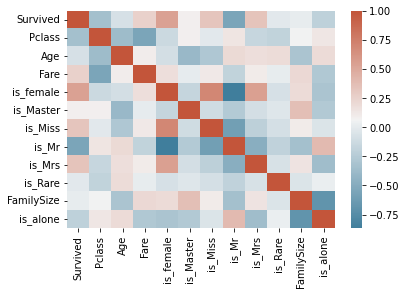

In [ ]:
corr_matr = train_df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matr, cmap = cmap)